In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
data_file = "/home/xuanhien/Downloads/Solo12_Walk_Recordings/solo_experiment_walk_1.npz"
data = np.load(data_file)

In [8]:
for i in data.keys():
    print(i)

q_mes
v_mes
torquesFromCurrentMeasurment
baseOrientation
baseAngularVelocity
baseLinearAcceleration
baseAccelerometer
mocapPosition
mocapVelocity
mocapAngularVelocity
mocapOrientationMat9
mocapOrientationQuat
estimatorVelocity
contactStatus
referenceVelocity
tstamps
log_feet_pos
log_feet_pos_target
log_feet_vel_target
log_feet_acc_target
log_q
log_dq
log_tau_ff
log_qdes
log_vdes


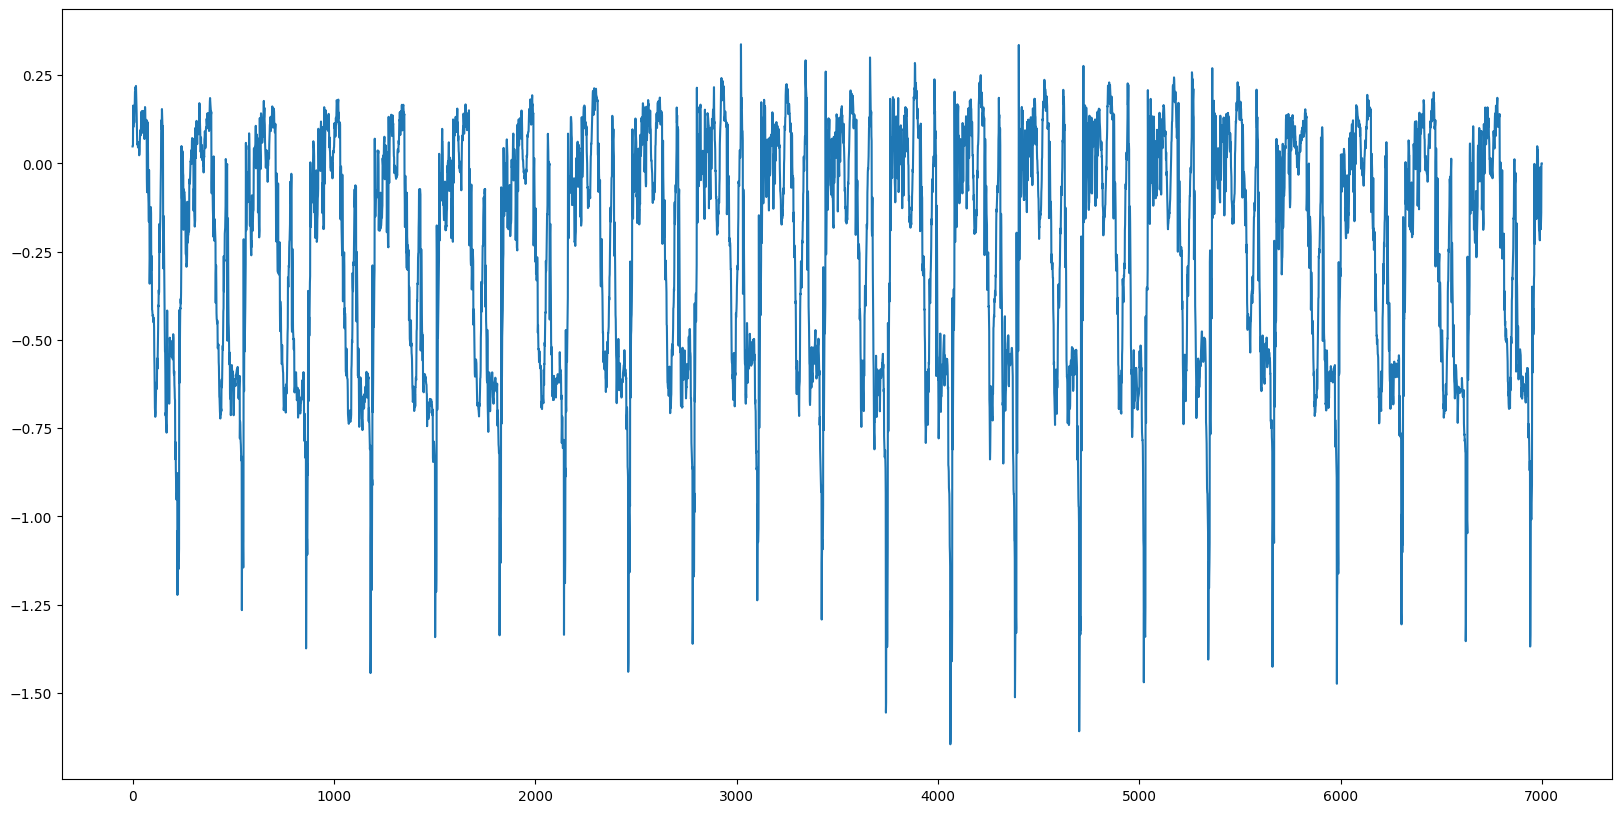

In [13]:
plt.plot(data["torquesFromCurrentMeasurment"][:, 0])

In [25]:
joint = 0
Kp = 6.0
Kd = 0.2
start_idx = 0
end_idx = 1000
measured_q = data["q_mes"][start_idx:end_idx, joint]
measured_v = data["v_mes"][start_idx:end_idx, joint]
desired_q = data["log_qdes"][joint, start_idx:end_idx]
desired_v = data["log_vdes"][joint, start_idx:end_idx]
measured_torque = data["torquesFromCurrentMeasurment"][start_idx:end_idx, joint]
ff_torque = data["log_tau_ff"][joint, start_idx:end_idx]
desired_torque = ff_torque + Kp * (desired_q - measured_q) + Kd * (desired_v - measured_v)

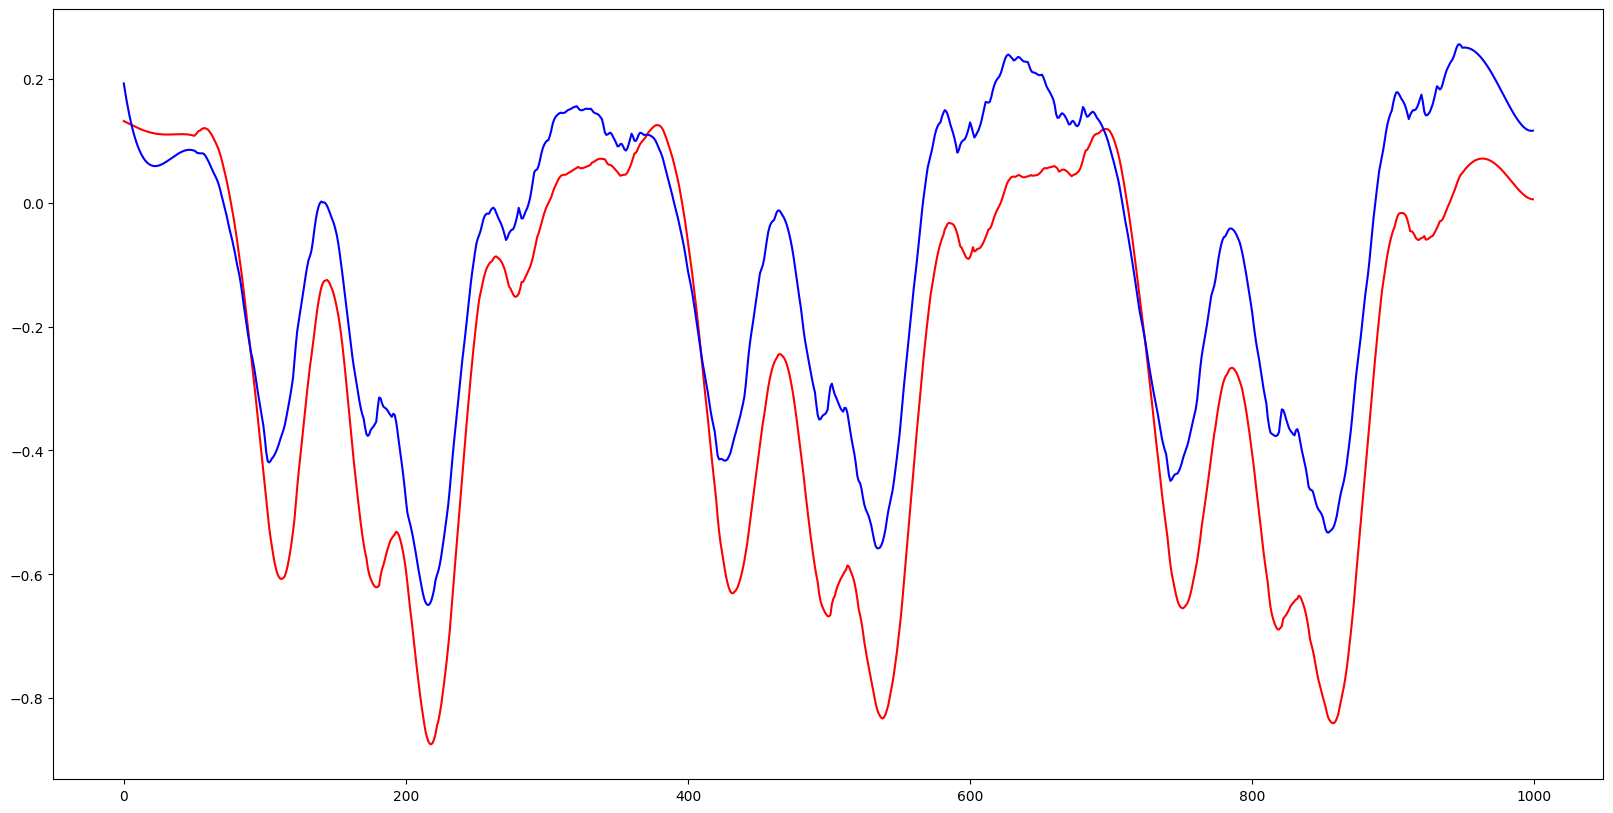

In [27]:
# filtering noises from velocities
window_length = 101
polyorder = 4
plt.plot(savgol_filter(measured_torque, window_length=window_length, polyorder=polyorder, axis=0), c="r")
plt.plot(savgol_filter(desired_torque, window_length=window_length, polyorder=polyorder, axis=0), c="b")